# Regresión lineal utilizando descenso de gradiente numérico (sin librerías)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_regression
import time

### Definición de los métodos numéricos

In [2]:
# Función de costo
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [3]:
# Cálculo del Gradiente
def numerical_gradient(X, y, theta, epsilon=1e-5):
    gradients = np.zeros(len(theta))
    for i in range(len(theta)):
        theta_plus = theta.copy()
        theta_plus[i] += epsilon
        theta_minus = theta.copy()
        theta_minus[i] -= epsilon
        cost_plus = compute_cost(X, y, theta_plus)
        cost_minus = compute_cost(X, y, theta_minus)
        gradients[i] = (cost_plus - cost_minus) / (2 * epsilon)
    return gradients

In [4]:
# Algoritmo de descenso de gradiente
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    gradient_errors = np.zeros(num_iterations)

    for i in range(num_iterations):
        gradients = numerical_gradient(X, y, theta)
        theta -= learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)

        # Cálculo del error dentro del algoritmo
        small_epsilon = 1e-7
        numerical_gradients = numerical_gradient(X, y, theta, epsilon=small_epsilon)
        relative_error = np.linalg.norm(gradients - numerical_gradients) / (np.linalg.norm(gradients) + np.linalg.norm(numerical_gradients) + small_epsilon)
        gradient_errors[i] = relative_error

    return theta, cost_history, gradient_errors

In [5]:
# Optimización de hiperparámetros
def optimize_learning_rate(X, y, theta, initial_learning_rate, num_iterations):
    best_learning_rate = initial_learning_rate
    best_cost = float('inf')

    for lr_factor in [0.1, 0.5, 1.0, 2.0]:
        current_learning_rate = initial_learning_rate * lr_factor
        current_theta, current_cost_history, _ = gradient_descent(X, y, theta, current_learning_rate, num_iterations)

        if current_cost_history[-1] < best_cost:
            best_cost = current_cost_history[-1]
            best_learning_rate = current_learning_rate

    return best_learning_rate

### Implementación de prueba

In [6]:
X, y = make_regression(n_samples=1000, n_features=1, noise=7, random_state=42)

# Dividir los datos en conjuntos de prueba y entrenamiento
X_train = X[:-100]
X_test = X[-100:]

# Dividir las etiquetas en conjuntos de prueba y entrenamiento
y_train = y[:-100]
y_test = y[-100:]

# Normalizar los datos (feature scaling)
mean_X_train = np.mean(X_train)
std_X_train = np.std(X_train)
X_train_normalized = (X_train - mean_X_train) / std_X_train
X_test_normalized = (X_test - mean_X_train) / std_X_train

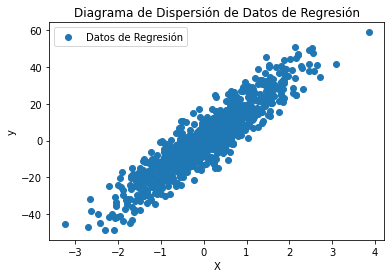

In [7]:
# Gráfico de los datos
plt.scatter(X, y, label='Datos de Regresión')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Diagrama de Dispersión de Datos de Regresión')
plt.legend()
plt.show()

In [8]:
# Término de intercepción
X_train_normalized = np.column_stack((np.ones(len(X_train_normalized)), X_train_normalized))
X_test_normalized = np.column_stack((np.ones(len(X_test_normalized)), X_test_normalized))

In [9]:
# Inicializar parámetros e hiperparámetros
theta = np.zeros(X_train_normalized.shape[1])

# Uso de la función para encontrar el mejor learning_rate
best_learning_rate = optimize_learning_rate(X_train_normalized, y_train, theta, initial_learning_rate=0.01, num_iterations=1000)
print(f"El mejor learning_rate encontrado: {best_learning_rate}")

El mejor learning_rate encontrado: 0.02


In [10]:
# Inicializar parámetros e hiperparámetros
theta = np.zeros(X_train_normalized.shape[1])
learning_rate = 0.02
num_iterations = 1000

# Entrenar el modelo
theta, cost_history, errors_list = gradient_descent(X_train_normalized, y_train, theta, learning_rate, num_iterations)

# Hacer predicciones mediante el conjunto de prueba
y_pred = X_test_normalized.dot(theta)

# Coeficientes del modelo
print("Coeficientes: \n", "theta_1 = ", theta[1], " theta_0  = ", theta[0])

Coeficientes: 
 theta_1 =  16.418974800043173  theta_0  =  0.34491387956947506


In [11]:
# Cálculo del error cuadrático medio
mse = np.mean((y_pred - y_test) ** 2)
print("Error cuadrático medio (MSE Cost): %.2f" % mse)

# Cálculo del coeficiente de determinación (r-squared)
ssr = np.sum((y_pred - np.mean(y_test)) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = (ssr / sst)
print("Coeficiente de determinación (R-squared): %.2f" % r_squared)

Error cuadrático medio (MSE Cost): 39.66
Coeficiente de determinación (R-squared): 0.92


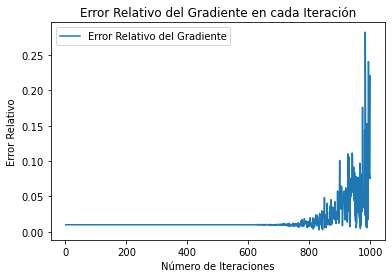

In [12]:
# Gráfico del error del gradiente por iteración
plt.plot(np.arange(1, num_iterations + 1), errors_list, label='Error Relativo del Gradiente')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Error Relativo')
plt.title('Error Relativo del Gradiente en cada Iteración')
plt.legend()
plt.show()

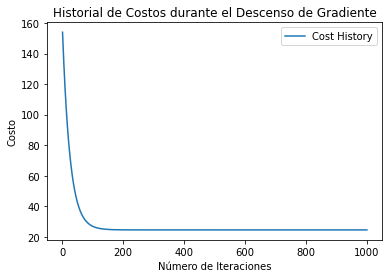

In [13]:
# Gráfico Costos vs Número de Iteración
plt.plot(np.arange(1, num_iterations + 1), cost_history, label='Cost History')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo')
plt.title('Historial de Costos durante el Descenso de Gradiente')
plt.legend()
plt.show()

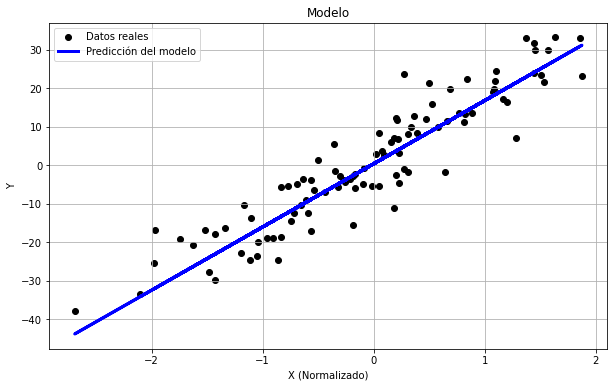

In [14]:
# Gráfico del modelo y el conjunto de test
plt.figure(figsize=(10, 6))
plt.scatter(X_test_normalized[:, 1], y_test, color="black", label="Datos reales")
plt.plot(X_test_normalized[:, 1], y_pred, color="blue", linewidth=3, label="Predicción del modelo")
plt.xlabel("X (Normalizado)")
plt.ylabel("Y")
plt.title("Modelo")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

## Aplicación en un problema real

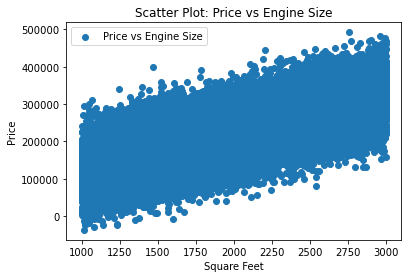

In [15]:
df = pd.read_csv("housing_price_dataset.csv")

SquareFeet_column = df['SquareFeet']
Price_column = df['Price']

plt.scatter(SquareFeet_column, Price_column, label='Price vs Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Price vs Square Feet')
plt.legend()
plt.show()

In [16]:
house_X_train = SquareFeet_column[:-1000]
house_X_test = SquareFeet_column[-1000:]

house_y_train = Price_column[:-1000]
house_y_test = Price_column[-1000:]

house_mean_X_train = np.mean(house_X_train)
house_std_X_train = np.std(house_X_train)
house_X_train_normalized = (house_X_train - house_mean_X_train) / house_std_X_train
house_X_test_normalized = (house_X_test - house_mean_X_train) / house_std_X_train

In [17]:
house_X_train_normalized = np.column_stack((np.ones(len(house_X_train_normalized)), house_X_train_normalized))
house_X_test_normalized = np.column_stack((np.ones(len(house_X_test_normalized)), house_X_test_normalized))

In [18]:
theta2 = np.zeros(house_X_train_normalized.shape[1])
best_learning_rate_final2 = optimize_learning_rate(house_X_train_normalized, house_y_train, theta2, initial_learning_rate=0.01, num_iterations=1000)
print(f"El mejor learning_rate encontrado: {best_learning_rate_final2}")

El mejor learning_rate encontrado: 0.02


In [19]:
# Inicializar parámetros e hiperparámetros
theta2 = np.zeros(house_X_train_normalized.shape[1])
learning_rate = 0.01
num_iterations = 1000

theta2, cost_history2, errors_list2 = gradient_descent(house_X_train_normalized, house_y_train, theta2, learning_rate, num_iterations)
house_y_pred = house_X_test_normalized.dot(theta2)

print("Coeficientes: \n", "theta_1 = ", theta2[1], " theta_0  = ", theta2[0])

Coeficientes: 
 theta_1 =  57134.57405567169  theta_0  =  224826.74288749695


In [20]:
# Cálculo del error cuadrático medio
mse = np.mean((house_y_pred - house_y_test) ** 2)
print("Error cuadrático medio (MSE Cost): %.2f" % mse)

# Cálculo del coeficiente de determinación (r-squared)
ssr = np.sum((house_y_pred - np.mean(house_y_test)) ** 2)
sst = np.sum((house_y_test - np.mean(house_y_test)) ** 2)
r_squared = 1 - (ssr / sst)
print("Coeficiente de determinación (R-squared): %.2f" % r_squared)

Error cuadrático medio (MSE Cost): 2614711875.96
Coeficiente de determinación (R-squared): 0.45


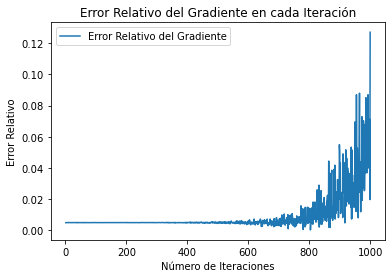

In [21]:
# Gráfico Error gradiente vs No. Iteraciones
plt.plot(np.arange(1, num_iterations + 1), errors_list2, label='Error Relativo del Gradiente')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Error Relativo')
plt.title('Error Relativo del Gradiente en cada Iteración')
plt.legend()
plt.show()

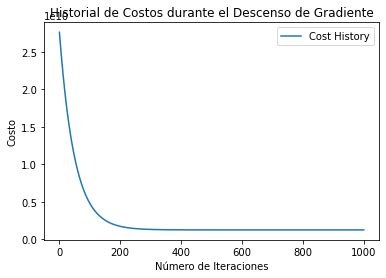

In [22]:
# Gráfico Función de costo vs No. Iteraciones
plt.plot(np.arange(1, num_iterations + 1), cost_history2, label='Cost History')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo')
plt.title('Historial de Costos durante el Descenso de Gradiente')
plt.legend()
plt.show()

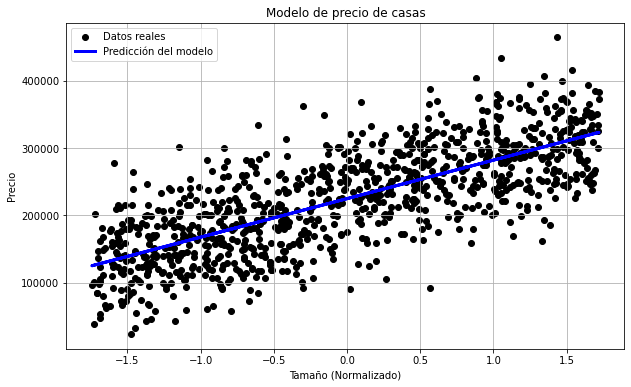

In [23]:
# Gráfico Modelo y Conjunto de Test
plt.figure(figsize=(10, 6))
plt.scatter(house_X_test_normalized[:, 1], house_y_test, color="black", label="Datos reales")
plt.plot(house_X_test_normalized[:, 1], house_y_pred, color="blue", linewidth=3, label="Predicción del modelo")
plt.xlabel("Tamaño (Normalizado)")
plt.ylabel("Precio")
plt.title("Modelo de precio de casas")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [24]:
# Tiempo de ejecución promedio del modelo propio
times = []
sum = 0
for i in range(100):
    start_time = time.time()
    theta2, cost_history, errors = gradient_descent(house_X_train_normalized, house_y_train, theta2, learning_rate, num_iterations)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

for j in range(100):
    sum += times[j]
average_time1 = sum / 100
print(f"Tiempo de ejecución método construido: {average_time1} segundos")

Tiempo de ejecución método construido: 5.208357982635498 segundos


## Modelo Construido Utilizando SKlearn

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [26]:
house_X_train, house_X_test, house_y_train, house_y_test = train_test_split(SquareFeet_column, Price_column, test_size=0.2, random_state=42)

# Instanciar el objeto de regresión lineal de sklearn
regr = LinearRegression()

# Normalizar los datos (feature scaling)
scaler = StandardScaler()
house_X_train_normalized = scaler.fit_transform(house_X_train.values.reshape(-1, 1))

# Entrenar el modelo mediante el conjunto de entrenamiento
regr.fit(house_X_train_normalized, house_y_train)

# Hacer predicciones mediante el conjunto de prueba
house_X_test_normalized = scaler.transform(house_X_test.values.reshape(-1, 1))
house_y_pred = regr.predict(house_X_test_normalized)

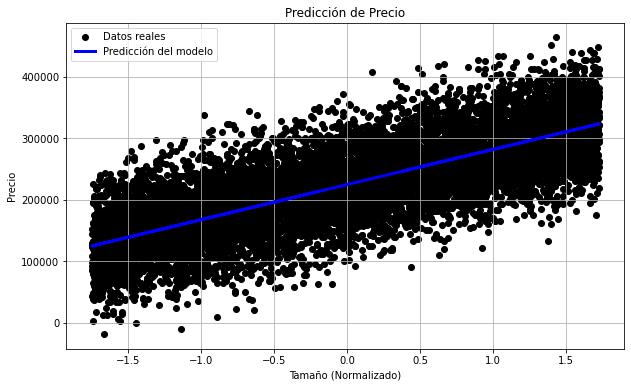

In [27]:
# Gráfico del modelo de sklearn
plt.figure(figsize=(10, 6))

plt.scatter(house_X_test_normalized, house_y_test, color="black", label="Datos reales")
plt.plot(house_X_test_normalized, house_y_pred, color="blue", linewidth=3, label="Predicción del modelo")

plt.xlabel("Tamaño (Normalizado)")
plt.ylabel("Precio")
plt.title("Predicción de Precio")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

## Comparación

In [28]:
# Modelo construido desde cero
print("Coeficientes del método construido")
print(f"theta_1 = {theta2[1]:.8f}, theta_0 = {theta2[0]:.8f}")
print(f"Error cuadrático medio (MSE Cost): {mse:.2f}")
print(f"Coeficiente de determinación (R-squared): {r_squared:.2f}")

# Modelo de sklearn
print("\nCoeficientes del modelo Sklearn:")
print(f"theta_1 = {regr.coef_[0]:.8f}, theta_0 = {regr.intercept_:.8f}")
print(f"Error cuadrático medio (MSE Cost): {mean_squared_error(house_y_test, house_y_pred):.2f}")
print(f"Coeficiente de determinación: {r2_score(house_y_test, house_y_pred):.2f}")

Coeficientes del método construido
theta_1 = 57137.03501225, theta_0 = 224836.42876148
Error cuadrático medio (MSE Cost): 2614711875.96
Coeficiente de determinación (R-squared): 0.45

Coeficientes del modelo Sklearn:
theta_1 = 57146.73529833, theta_0 = 224795.67294839
Error cuadrático medio (MSE Cost): 2466291899.58
Coeficiente de determinación: 0.57


In [29]:
# Tiempo de ejecución promedio del modelo construido con sklearn 
times = []
sum = 0
for i in range(100):
    start_time = time.time()
    regr.fit(house_X_train_normalized, house_y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

for j in range(100):
    sum += times[j]
average_time2 = sum / 100
print(f"Tiempo de ejecución método construido: {average_time1} segundos")
print(f"Tiempo de ejecución modelo sklearn:    {average_time2} segundos")

Tiempo de ejecución método construido: 5.208357982635498 segundos
Tiempo de ejecución modelo sklearn:    0.0006674981117248535 segundos
